Import Libraries

In [160]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import pickle

Functions

In [161]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# THIS IS A FUNCITON YOU CAN CALL FROM OTHER PLACES TO GET THE DATA 
def CSV_Read_Lidar_data(data_path):
    rows = []
    with open(data_path, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return header, rows

Read the CSV File

In [162]:
rows = []
file_path = 'Data/'
file_name = 'RISLHallwayWithTurn'
with open(file_path+file_name+'.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

headers = np.array(header).T


test


Create pd Series and DataFrames

In [163]:
# Create a Series for the header
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info

,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000113
scan_time,0.121978
range_min,0.150000
range_max,12.000000


In [164]:
# create a lidar rho dataframe
translation_df = pd.DataFrame(np.array(rows[3::5]))
translation_df = translation_df.T.astype(float)
translation_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.308761,-0.308855,-0.353952,-0.484498,-0.625857,-0.726525,-0.843965,-0.992474,-1.072354,-1.206262,...,-10.423016,-10.548346,-10.655045,-10.764661,-10.844087,-10.973002,-11.063924,-11.177693,-11.260469,-11.376391
1,9.424052,9.424123,9.427510,9.427880,9.428835,9.431733,9.431922,9.428872,9.434957,9.434707,...,-3.443109,-3.379144,-3.359789,-3.343473,-3.425934,-3.344959,-3.384275,-3.347645,-3.421818,-3.389924
2,0.470553,0.469067,0.468701,0.474903,0.468653,0.469738,0.482484,0.497896,0.474801,0.473790,...,0.328067,0.344773,0.405049,0.381693,0.351175,0.311954,0.308837,0.379428,0.401393,0.391756
3,0.000394,0.000377,0.000257,0.001088,0.000926,0.001280,0.001572,0.001567,0.001218,0.000943,...,0.004386,0.005372,0.005180,0.005851,0.005410,0.004213,0.003698,0.004861,0.005052,0.004106
4,0.001973,0.001848,0.002015,0.001300,0.000946,0.000516,0.001304,0.002754,0.001138,0.001433,...,-0.005691,-0.004905,-0.002202,-0.003218,-0.004546,-0.006303,-0.006436,-0.003381,-0.002416,-0.002837
5,-0.486077,-0.486077,-0.488845,-0.487674,-0.486054,-0.486274,-0.485677,-0.483606,-0.484781,-0.483458,...,0.274607,0.271746,0.271056,0.270434,0.274237,0.270807,0.272654,0.271164,0.274472,0.273260
6,0.873914,0.873914,0.872368,0.873024,0.873928,0.873805,0.874136,0.875280,0.874634,0.875366,...,0.961530,0.962342,0.962547,0.962715,0.961636,0.962604,0.962084,0.962515,0.961579,0.961927


In [165]:
(translation_df[0][6])

0.8739139191029766

In [166]:
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[1::5]))
rho_df = rho_df.T
rho_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.3639999628067017,1.3660000562667847,1.3700000047683716,1.371999979019165,1.3739999532699585,1.378000020980835,1.3799999952316284,1.3799999952316284,1.3819999694824219,1.3839999437332153,...,inf,1.684000015258789,1.6779999732971191,1.6779999732971191,1.6820000410079956,1.687999963760376,1.687999963760376,1.6920000314712524,1.694000005722046,1.6979999542236328
1,1.3660000562667847,1.3660000562667847,1.371999979019165,1.3739999532699585,1.3739999532699585,1.378000020980835,1.3799999952316284,1.3799999952316284,1.3819999694824219,1.3839999437332153,...,inf,1.684000015258789,1.6759999990463257,1.6779999732971191,1.684000015258789,1.687999963760376,1.6920000314712524,1.6920000314712524,1.6959999799728394,1.6979999542236328
2,1.3660000562667847,1.3680000305175781,1.371999979019165,1.3739999532699585,1.3739999532699585,1.378000020980835,1.3799999952316284,1.3799999952316284,1.3819999694824219,1.3839999437332153,...,inf,1.684000015258789,1.6759999990463257,1.6820000410079956,1.684000015258789,1.687999963760376,1.6920000314712524,1.694000005722046,1.6959999799728394,1.6979999542236328
3,1.3660000562667847,1.3680000305175781,1.371999979019165,1.3739999532699585,1.3739999532699585,1.378000020980835,1.3799999952316284,1.3819999694824219,1.3819999694824219,1.3839999437332153,...,inf,1.6759999990463257,1.6799999475479126,1.6820000410079956,1.6859999895095825,1.687999963760376,1.690000057220459,1.694000005722046,1.6959999799728394,1.7000000476837158
4,1.3660000562667847,1.3700000047683716,1.3739999532699585,1.3739999532699585,1.3760000467300415,1.378000020980835,1.3799999952316284,1.3819999694824219,1.3819999694824219,1.3839999437332153,...,inf,1.6759999990463257,1.6799999475479126,1.6799999475479126,1.6859999895095825,1.687999963760376,1.690000057220459,1.6959999799728394,1.6959999799728394,1.7000000476837158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.3619999885559082,1.3660000562667847,1.371999979019165,1.371999979019165,1.3739999532699585,1.3760000467300415,1.378000020980835,1.3819999694824219,1.3819999694824219,1.3839999437332153,...,inf,inf,1.6759999990463257,1.6799999475479126,1.6820000410079956,1.6859999895095825,1.690000057220459,1.6920000314712524,1.694000005722046,1.6979999542236328
1076,1.3619999885559082,1.3660000562667847,1.371999979019165,1.3739999532699585,1.3760000467300415,1.3760000467300415,1.378000020980835,1.3799999952316284,1.3819999694824219,1.3839999437332153,...,inf,inf,1.6759999990463257,1.6779999732971191,1.6820000410079956,1.6859999895095825,1.687999963760376,1.6920000314712524,1.694000005722046,1.6979999542236328
1077,1.3639999628067017,1.3660000562667847,1.3700000047683716,1.3739999532699585,1.3739999532699585,1.3760000467300415,1.3799999952316284,1.3799999952316284,1.3819999694824219,1.3839999437332153,...,inf,inf,1.6759999990463257,1.6779999732971191,1.6820000410079956,1.6859999895095825,1.687999963760376,1.690000057220459,1.694000005722046,1.6979999542236328
1078,1.3660000562667847,1.3660000562667847,1.3700000047683716,1.3739999532699585,1.3739999532699585,1.3760000467300415,1.3799999952316284,1.3799999952316284,1.3819999694824219,1.3839999437332153,...,inf,inf,1.6740000247955322,1.6779999732971191,1.684000015258789,1.687999963760376,1.687999963760376,1.6920000314712524,1.694000005722046,1.6979999542236328


In [167]:
# create a dataframe of the radian alphas
alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    # Header_info.loc['angle_increment'][i] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081) + math.pi/2
# alpha_df = alpha_df.transpose().drop(del_indexes, axis=1).transpose()
alpha_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,...,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807
1,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,...,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614
2,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,...,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421
3,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,...,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228
4,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,...,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,...,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311
1076,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,...,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118
1077,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,...,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925
1078,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,...,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732


In [168]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

del_indexes = np.array(list(rho_df[0][rho_df[0].astype(float) <= 1.4].index))
del_indexes


array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047,
       1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058,
       1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069,
       1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079])

In [169]:
# Create the cartesasion dataset, combine with the polar, then save into a new dataset
all_data_df = []


for i in range(alpha_df.shape[1]-1):

    cartesian_df = pd.DataFrame(pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float)), ['X', 'Y'])
    alpha_rho_df = pd.DataFrame(cart2pol(rho_df[i].astype(float), alpha_df[i].astype(float)), ['Rho', 'Alpha'])
    # telometry_df = pd.DataFrame(translation_df[i][0],translation_df[i][1],translation_df[i][2],translation_df[i][3],translation_df[i][4],translation_df[i][5],translation_df[i][6],['tx','ty','tz','rx','ry','rz','rw'])
    # telometry_df = pd.DataFrame(translation_df[i][0],translation_df[i][1],translation_df[i][2],translation_df[i][3],['tx','ty','tz','rx','ry','rz','rw'])

    #Finally combine the xy data and alpha rho data
    combined_df = pd.concat([alpha_rho_df, cartesian_df])
    # print(translation_df[i])
    combined_df = combined_df.drop(del_indexes, axis=1)
    combined_df = combined_df.T.reset_index(drop=True).T
    combined_df = pd.concat([combined_df, translation_df]).T
    all_data_df.append(combined_df)
all_data_df


[           Rho     Alpha         X         Y         0         1         2  \
 0     1.416655  0.143965  1.373142  0.282991 -0.308761  9.424052  0.470553   
 1     1.419478  0.147811  1.373432  0.291375 -0.308855  9.424123  0.469067   
 2     1.420345  0.151855  1.371717  0.299345 -0.353952  9.427510  0.468701   
 3     1.425187  0.155458  1.373859  0.308181 -0.484498  9.427880  0.474903   
 4     1.426097  0.159481  1.372046  0.316154 -0.625857  9.428835  0.468653   
 ...        ...       ...       ...       ...       ...       ...       ...   
 999   6.167292  1.340464  1.353644 -0.387441       NaN       NaN       NaN   
 1000  6.172946  1.340679  1.355872 -0.379574       NaN       NaN       NaN   
 1001  6.178600  1.340893  1.358053 -0.371694       NaN       NaN       NaN   
 1002  6.183799  1.341422  1.358256 -0.363285       NaN       NaN       NaN   
 1003  6.188547  1.342265  1.356473 -0.354380       NaN       NaN       NaN   
 
              3         4         5         6  
 0

In [170]:
all_data_df

[           Rho     Alpha         X         Y         0         1         2  \
 0     1.416655  0.143965  1.373142  0.282991 -0.308761  9.424052  0.470553   
 1     1.419478  0.147811  1.373432  0.291375 -0.308855  9.424123  0.469067   
 2     1.420345  0.151855  1.371717  0.299345 -0.353952  9.427510  0.468701   
 3     1.425187  0.155458  1.373859  0.308181 -0.484498  9.427880  0.474903   
 4     1.426097  0.159481  1.372046  0.316154 -0.625857  9.428835  0.468653   
 ...        ...       ...       ...       ...       ...       ...       ...   
 999   6.167292  1.340464  1.353644 -0.387441       NaN       NaN       NaN   
 1000  6.172946  1.340679  1.355872 -0.379574       NaN       NaN       NaN   
 1001  6.178600  1.340893  1.358053 -0.371694       NaN       NaN       NaN   
 1002  6.183799  1.341422  1.358256 -0.363285       NaN       NaN       NaN   
 1003  6.188547  1.342265  1.356473 -0.354380       NaN       NaN       NaN   
 
              3         4         5         6  
 0

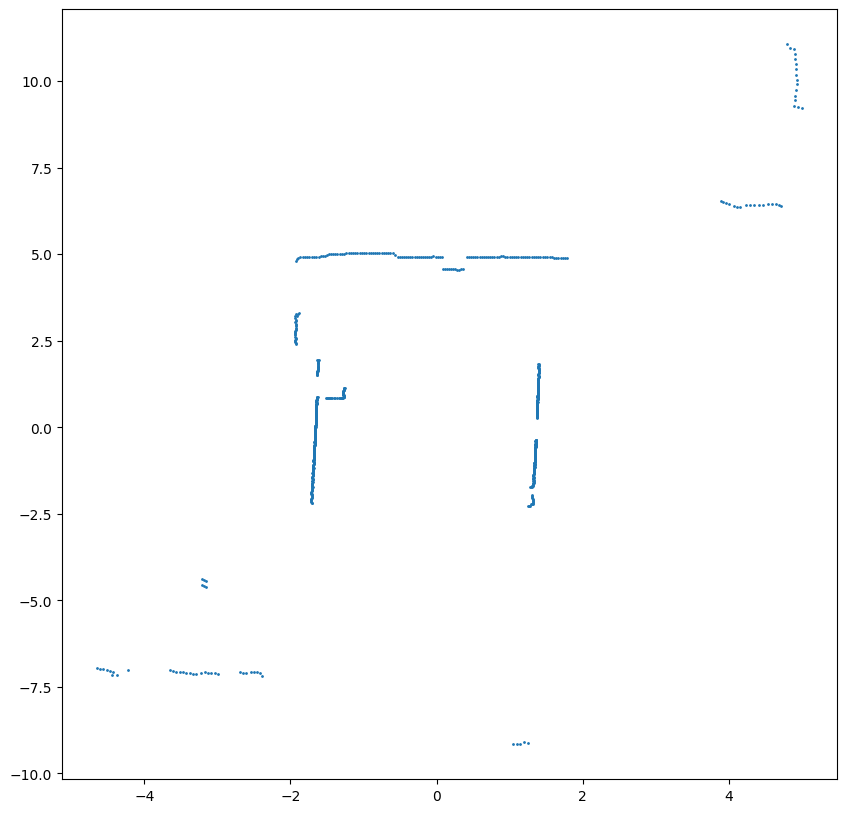

In [171]:
plt_idx = 0

plt.figure(figsize=(10, 10))
plt.scatter(all_data_df[plt_idx]['X'], all_data_df[plt_idx]['Y'], s=1)
plt.show()


In [172]:
# write to csv
addition = '_scan_data_organized'

# Save data
tmp_df = pd.DataFrame()

for i in range(len(all_data_df)):
    tmp_df = pd.concat([tmp_df, all_data_df[i]])
tmp_df = tmp_df
tmp_df.to_pickle(file_path + file_name + addition + '.pkl')


# write to csv
addition = '_scan_data_organized'

# Save data
tmp_df = pd.DataFrame()

for i in range(len(all_data_df)):
    tmp_df = pd.concat([tmp_df, all_data_df[i]])
tmp_df = tmp_df
tmp_df.to_csv(file_path + file_name + addition + '.csv')

In [173]:
# # Load datapath and put into dataframe
# # path to csv data
# data_path = 'Data_Readers_Writers/Data/Hallway_Lidar_data_dinosars2_scan_data_organized.csv'
# tmp_df = pd.read_csv(data_path)

# #read and turn to list
# lowrange = 0
# highrange = 1070

# scan_df = []
# for i in range(int(tmp_df.shape[0]/1070)):
#     lowrange = lowrange + 1070 * i
#     highrange = highrange + 1070 * i
#     scan_df.append(tmp_df.iloc[lowrange:highrange, :])

# # Delete any column that has an inf in the rho spot
# for i in range(len(scan_df)):
#     inf_cols = scan_df[i]['Rho'][np.isfinite(scan_df[i]['Rho'])]
#     # print(inf_cols.index)
#     scan_df[i] = scan_df[i].T[inf_cols.index].T.reset_index(drop=True)
# scan_df[2]
